<a href="https://colab.research.google.com/github/sreeramulu/PPAOC/blob/main/PPAOC_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

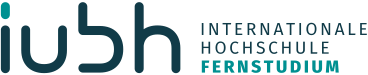

PPAOC Pipeline | Topics:
--- | ---
| <center> features, label, churn,model, classification,Regression NLP, <br> Tuning, Hyperparameter, XGBoost, Log. regression </center>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive




# Intro
Since our case a classification problem, we must obtain a labelled dataset, The data set used for this classification problem is sourced from the publicly available telecom dataset (Originally sourced from IBM sample dataset). Below is the link for the same (click here). Additionally the same model is tested for Comcast XM Mobile with internal data sources like Data Lake, collected from the likes of Technician app, campaign feedbacks, endorsements, few third party dedicated consultancies like survey monkey. <br>
The process of building up the use case pipeline begins by importing certain fundamental libraries that will be necessary throughout the case. The tools used for data handling and processing include Pandas and Numpy. Additionally, for visualisation purposes, Matplotlib and Seaborn are utilised.

Some studies showed that **machine learning practitioners spend 60 to 80% of their time with data preparation!**

This is just one concrete example. Each data set will have its own peculiarities, thus **data preparation often feels like problem solving**. <br>

# The Data and Structure

Before we even think about what algorithm works well for this task, we have to make sense of the data and ultimately convert it to an input matrix $X$ and the vector of labels $y$, **all numbers**.

# Loading of the Data

It always helps to start looking at the first few lines:

In [3]:
CCPT_FILE = '/content/gdrive/My Drive/Colab Notebooks/AIAcademy_old/Data/Customer-Churn.csv'

# print the first few lines in this file
with open(CCPT_FILE) as f:
  for i in range(5):
    print(f.readline())


customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn

7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No

5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No

3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes

7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No



(Reminder: Our task is to convert the above to a matrix of numbers $X$ and a vector of numbers $y$ so that we can apply some machine algorithm to the problem).

* the file format is CSV.
* The size of the file is 18MB so it should fit in memory without problem.

Let's use Pandas to read the whole csv file in memory.


In [4]:
# Use Pandas' read_csv method to read the whole file in memory
# (it will fail on our first try)
# Name the returned data frame "data1"
import pandas as pd

data1 = pd.read_csv(CCPT_FILE, encoding='latin')
data1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# EDA Exporatory Data Analysis

Ok, we were able to load the csv in memory. <br>
Pandas provide the `describe()` method that gives a quick overview of the whole file:

In [5]:
data1.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Key points:
* There are 7043 rows
* There are total of 21 columns: 3 numerical, 16 categorical, 1 id and 1 target column
* 'Total Charges' provides a numerical values, but the numbers are stored as on object
Some categorical features are stored as a string
* Churn is the target variable


Have a look at https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.startswith.html


In [7]:
# a quick overview of the data
data1.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
# find Unique values per column by using for loop
for column in data1.columns:
    unique_count = data1[column].nunique()
    unique_values = data1[column].unique()
    print(f"Unique {column}'s count: {unique_count}")
    print(unique_values)
    print()

Unique customerID's count: 7043
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

Unique gender's count: 2
['Female' 'Male']

Unique SeniorCitizen's count: 2
[0 1]

Unique Partner's count: 2
['Yes' 'No']

Unique Dependents's count: 2
['No' 'Yes']

Unique tenure's count: 73
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

Unique PhoneService's count: 2
['No' 'Yes']

Unique MultipleLines's count: 3
['No phone service' 'No' 'Yes']

Unique InternetService's count: 3
['DSL' 'Fiber optic' 'No']

Unique OnlineSecurity's count: 3
['No' 'Yes' 'No internet service']

Unique OnlineBackup's count: 3
['Yes' 'No' 'No internet service']

Unique DeviceProtection's count: 3
['No' 'Yes' 'No internet service']

Unique TechSupport's count: 3
['No' 'Yes' 'No internet service']

Unique StreamingTV's

# Data Preprocessing for EDA

In [9]:
# Making sure there aren't any unexpected data types
data1.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Convert the datatypes

In [11]:
import pandas as pd
# Lets convert the datatype of features "TotalCharges" and "tenure" to float
data1['TotalCharges'] = pd.to_numeric(data1['TotalCharges'], errors='coerce')
data1['tenure'] = data1['tenure'].astype(float)
data1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [12]:
# Rename feature values of "PaymentMethod" for better readability
payment_method_mapping = {'Electronic check': 'E-Check', 'Mailed check': 'Mailed check', 'Bank transfer (automatic)': 'Bank transfer', 'Credit card (automatic)': 'Credit card'}
data1["PaymentMethod"].replace(payment_method_mapping, inplace=True)
data1.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [13]:
# check for NA or null values
data1.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [14]:
# Visualize a frequency distribution for label
import plotly.graph_objects as go

churn_counts = data1['Churn'].value_counts()

fig = go.Figure(data=[
    go.Bar(x=churn_counts.index, y=churn_counts.values, marker_color='rgb(102, 197, 204)')
])

fig.update_layout(
    title='Churn Counts',
    xaxis_title='Churn',
    yaxis_title='Count',
    width=500,
    height=500,
    showlegend=False
)

fig.show()

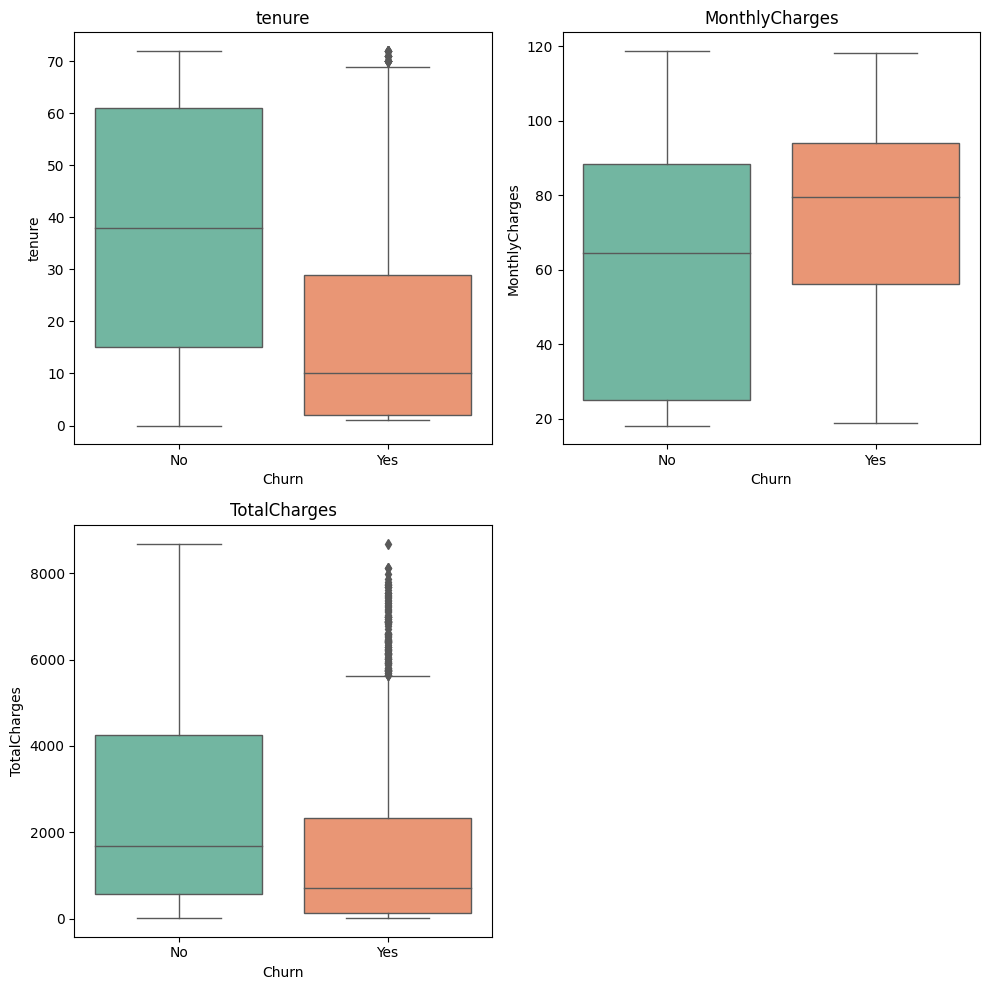

In [15]:
# Lets work on generating boxplots
import matplotlib.pyplot as plt
import seaborn as sns

def create_boxplots(x, y, data):
    num_plots = len(y)
    rows = (num_plots // 2) + (num_plots % 2)
    cols = 2

    plt.figure(figsize=(5 * cols, 5 * rows))

    for i, var in enumerate(y):
        plt.subplot(rows, cols, i + 1)
        sns.boxplot(x=x, y=var, data=data, palette="Set2", linewidth=1)
        plt.title(var)

    plt.tight_layout()
    plt.show()

create_boxplots("Churn", ["tenure", "MonthlyCharges", "TotalCharges"], data1)


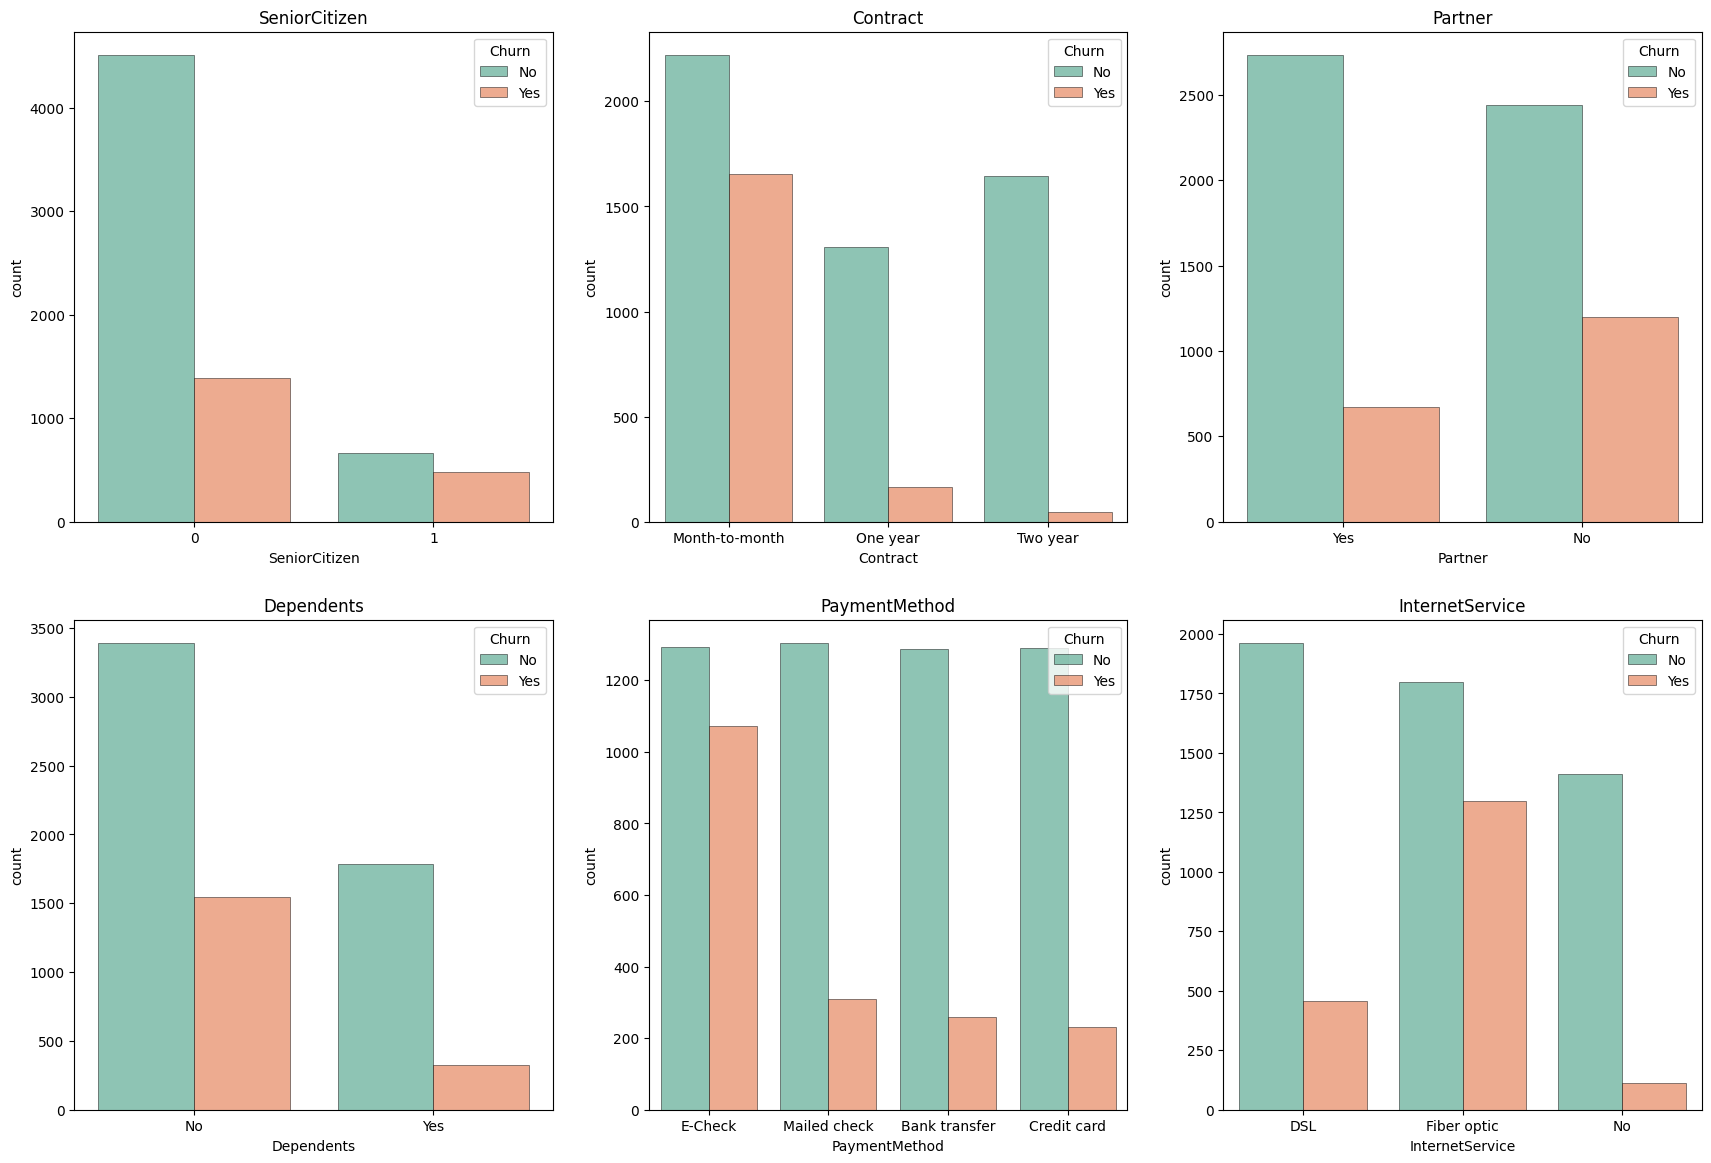

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

def generate_countplots(x, y, df):
    plots = {1: [1, 1], 2: [1, 2], 3: [1, 3], 4: [2, 2], 5: [2, 3], 6: [2, 3]}

    rows = plots[len(y)][0]
    columns = plots[len(y)][1]
    plt.figure(figsize=(7*columns, 7*rows))

    for i, j in enumerate(y):

        plt.subplot(rows, columns, i+1)
        ax = sns.countplot(x=j, hue=x, data=df, palette='Set2', alpha=0.8, linewidth=0.4, edgecolor='black')
        ax.set_title(j)

    # Save each countplot as an image file
    for i, j in enumerate(y):
        plt.subplot(rows, columns, i+1)
        plt.savefig(f'countplot_{j}.png')  # Save countplot as image
    return plt.show()

# Generate countplots for various features.
generate_countplots("Churn", ['SeniorCitizen', 'Contract', 'Partner', 'Dependents', 'PaymentMethod', 'InternetService'], data1)


Skewness of the Data

In [20]:
# Checking Skew data
# Checking kurtosis (amount of data in the tail)
# Clipping outliers for skewed features with low data in the tail

from scipy.stats import skew
from scipy.stats import kurtosis

def get_outliers_clipped(dataframe, col_name):
    """
    Function to clip outliers and handle them for categorical features
    """
    dataframe = dataframe.copy()
    q25 = dataframe[col_name].quantile(0.25)
    q75 = dataframe[col_name].quantile(0.75)
    iqr = q75 - q25
    upper_limit = q75 + 1.5 * iqr
    lower_limit = q25 - 1.5 * iqr
    outlier_idx = (dataframe[col_name] > upper_limit) | (dataframe[col_name] < lower_limit)
    print(round(100 * outlier_idx.sum() / len(dataframe), 2), "% outliers clipped in feature", col_name)
    dataframe.loc[dataframe.loc[:, col_name] > upper_limit, col_name] = upper_limit
    dataframe.loc[dataframe.loc[:, col_name] < lower_limit, col_name] = lower_limit
    return dataframe

numeric_cols = data1.select_dtypes(include=['float64', 'int64'])
skew_values = skew(numeric_cols)
kurtosis_values = kurtosis(numeric_cols)

df_clipped = data1.copy()

for i, col in enumerate(numeric_cols):
    print('Column:', col)
    print('Skew:', skew_values[i])
    print('Kurtosis:', kurtosis_values[i])

    if skew_values[i] > 1.0:
        skewness = 'Positive'
    elif skew_values[i] < -1:
        skewness = 'Negative'
    else:
        skewness = 'No'

    if kurtosis_values[i] > 1.5:
        kurtic = 'Leptokurtic'
    elif kurtosis_values[i] < -1.5:
        kurtic = 'Platykurtic'
    else:
        kurtic = 'Mesokurtic'

    print('Skewness:', skewness)
    print('Kurtosis:', kurtic)

    if (skewness == 'Positive' or skewness == 'Negative') and (kurtic == 'Mesokurtic' or kurtic == 'Platykurtic'):
        df_clipped = get_outliers_clipped(df_clipped, col)

    print()


Column: SeniorCitizen
Skew: 1.8307119269100947
Kurtosis: 1.3515061593308735
Skewness: Positive
Kurtosis: Mesokurtic
16.24 % outliers clipped in feature SeniorCitizen

Column: tenure
Skew: 0.23768011839839964
Kurtosis: -1.3876891061975711
Skewness: No
Kurtosis: Mesokurtic

Column: MonthlyCharges
Skew: -0.22205554798978874
Kurtosis: -1.2561165516571853
Skewness: No
Kurtosis: Mesokurtic

Column: TotalCharges
Skew: 0.9614373590490068
Kurtosis: -0.23248709758655117
Skewness: No
Kurtosis: Mesokurtic



Lets plot again

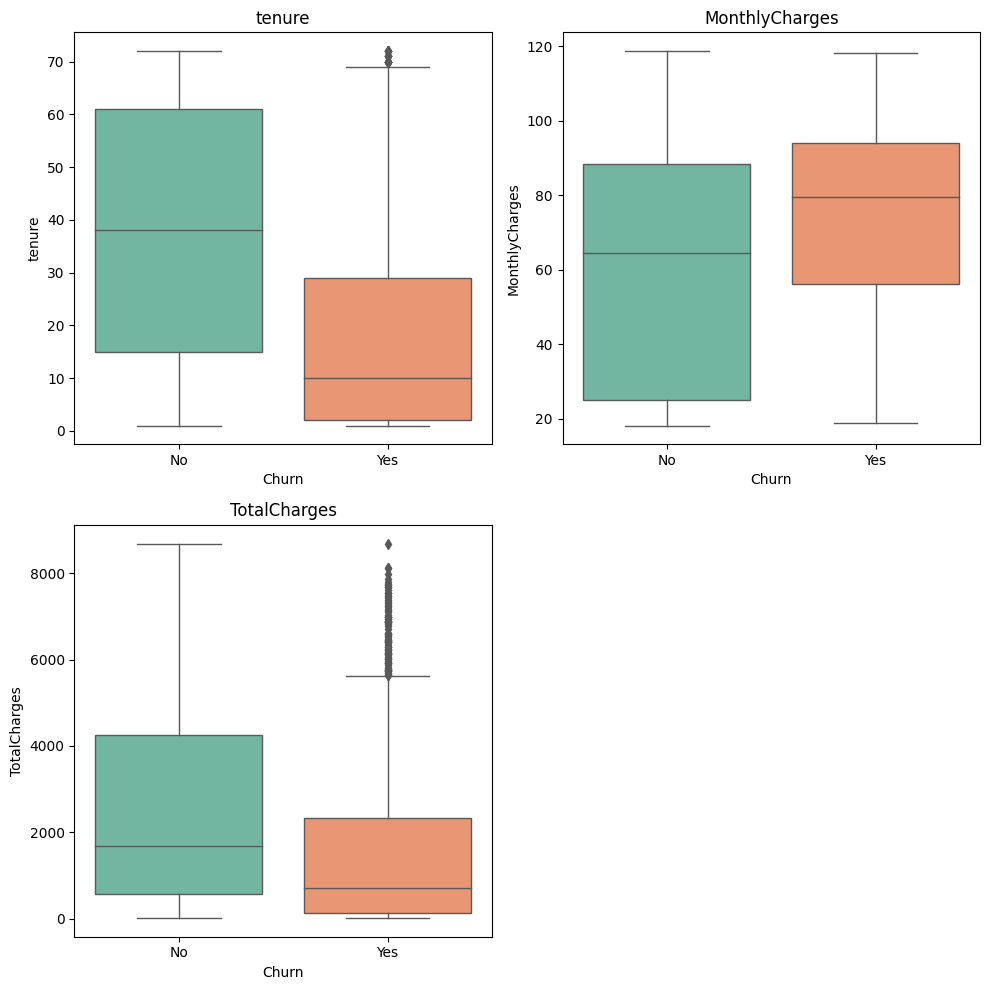

In [22]:
# Lets work on generating boxplots
import matplotlib.pyplot as plt
import seaborn as sns

def create_boxplots(x, y, data):
    num_plots = len(y)
    rows = (num_plots // 2) + (num_plots % 2)
    cols = 2

    plt.figure(figsize=(5 * cols, 5 * rows))

    for i, var in enumerate(y):
        plt.subplot(rows, cols, i + 1)
        sns.boxplot(x=x, y=var, data=data, palette="Set2", linewidth=1)
        plt.title(var)

    plt.tight_layout()
    plt.show()

create_boxplots("Churn", ["tenure", "MonthlyCharges", "TotalCharges"], df_clipped)


IQR

In [25]:
data1=df_clipped

In [26]:
# Identify missing values
data1.isnull().sum(axis=0)
data1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,E-Check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer,42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,E-Check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card,103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,E-Check,29.60,346.45,No
7041,8361-LTMKD,Male,0,Yes,No,4.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [19]:
# Drop the rows with missing values.
data1 = data1.dropna()
data1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,E-Check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer,42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,E-Check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card,103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,E-Check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [27]:
# Drop the customerID feature from the dataset
data1 = data1.drop(columns='customerID')


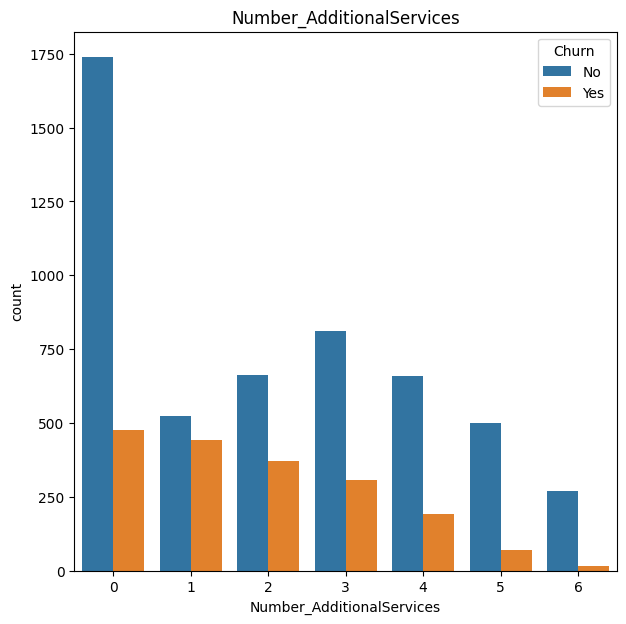

In [28]:
# Generate a new feature "Number_AdditionalServices" by summing up the number of add-on services consumed
additional_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
data1['Number_AdditionalServices'] = data1[additional_services].apply(lambda row: sum(row == 'Yes'), axis=1)

# Define the countplot function
def countplot(x, y, df):
    rows = len(y)
    columns = 1
    plt.figure(figsize=(7*columns, 7*rows))
    for i, j in enumerate(y):
        plt.subplot(rows, columns, i+1)
        ax = sns.countplot(x=j, hue=x, data=df)
        ax.set_title(j)
    plt.show()

# Generate a countplot for the new feature
countplot('Churn', ['Number_AdditionalServices'], data1)

In [29]:
data1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Number_AdditionalServices
0,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,E-Check,29.85,29.85,No,1
1,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,2
2,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,2
3,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer,42.30,1840.75,No,3
4,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,E-Check,70.70,151.65,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,5
7039,Female,0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,One year,Yes,Credit card,103.20,7362.90,No,4
7040,Female,0,Yes,Yes,11.0,No,No phone service,DSL,Yes,No,...,No,No,No,Month-to-month,Yes,E-Check,29.60,346.45,No,1
7041,Male,0,Yes,No,4.0,Yes,Yes,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,0


2.4.2. Label Encoding

In [ ]:
# Apply label encoding to the specified columns
encoded_columns = ['Partner', 'Dependents', 'Churn', 'PhoneService', 'PaperlessBilling']

def perform_label_encoding(columns, dataset):
    dataset = dataset.copy()  # Create a copy of the dataset
    for col in columns:
        dataset.loc[:, col] = dataset.loc[:, col].map({'Yes': 1, 'No': 0})
    return dataset

# Apply label encoding to the dataset
data1 = perform_label_encoding(encoded_columns, data1)

# Perform label encoding for the 'gender' column
data1.loc[:, 'gender'] = data1.loc[:, 'gender'].map({'Female': 1, 'Male': 0}).copy()

# Display the modified dataset
data1


<ipython-input-18-d733e927c936>:7: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

<ipython-input-18-d733e927c936>:7: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

<ipython-input-18-d733e927c936>:7: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

<ipython-input-18-d733e927c936>:7: DeprecationWarning:

In a future version,

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Number_AdditionalServices
0,1,0,1,0,1.0,0,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,1,E-Check,29.85,29.85,0,1
1,0,0,0,0,34.0,1,No,DSL,Yes,No,...,No,No,No,One year,0,Mailed check,56.95,1889.50,0,2
2,0,0,0,0,2.0,1,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1,2
3,0,0,0,0,45.0,0,No phone service,DSL,Yes,No,...,Yes,No,No,One year,0,Bank transfer,42.30,1840.75,0,3
4,1,0,0,0,2.0,1,No,Fiber optic,No,No,...,No,No,No,Month-to-month,1,E-Check,70.70,151.65,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24.0,1,Yes,DSL,Yes,No,...,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.50,0,5
7039,1,0,1,1,72.0,1,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,One year,1,Credit card,103.20,7362.90,0,4
7040,1,0,1,1,11.0,0,No phone service,DSL,Yes,No,...,No,No,No,Month-to-month,1,E-Check,29.60,346.45,0,1
7041,0,1,1,0,4.0,1,Yes,Fiber optic,No,No,...,No,No,No,Month-to-month,1,Mailed check,74.40,306.60,1,0


2.4.3 One-Hot-Encoding

In [ ]:
# Perform One-Hot Encoding for identified columns
one_hot_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod', 'Number_AdditionalServices']

df_encoded = pd.get_dummies(data1, columns=one_hot_columns)
df_encoded


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,PaymentMethod_Credit card,PaymentMethod_E-Check,PaymentMethod_Mailed check,Number_AdditionalServices_0,Number_AdditionalServices_1,Number_AdditionalServices_2,Number_AdditionalServices_3,Number_AdditionalServices_4,Number_AdditionalServices_5,Number_AdditionalServices_6
0,1,0,1,0,1.0,0,1,29.85,29.85,0,...,0,1,0,0,1,0,0,0,0,0
1,0,0,0,0,34.0,1,0,56.95,1889.50,0,...,0,0,1,0,0,1,0,0,0,0
2,0,0,0,0,2.0,1,1,53.85,108.15,1,...,0,0,1,0,0,1,0,0,0,0
3,0,0,0,0,45.0,0,0,42.30,1840.75,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,2.0,1,1,70.70,151.65,1,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24.0,1,1,84.80,1990.50,0,...,0,0,1,0,0,0,0,0,1,0
7039,1,0,1,1,72.0,1,1,103.20,7362.90,0,...,1,0,0,0,0,0,0,1,0,0
7040,1,0,1,1,11.0,0,1,29.60,346.45,0,...,0,1,0,0,1,0,0,0,0,0
7041,0,1,1,0,4.0,1,1,74.40,306.60,1,...,0,0,1,1,0,0,0,0,0,0


2.4.4 Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Choose the columns that needs Min-Max Scaling for normalization
scaling_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Create a DataFrame with the selected columns for scaling
scaling_df = df_encoded[scaling_columns]
scaling_df

,tenure,MonthlyCharges,TotalCharges
0,1.0,29.85,29.85
1,34.0,56.95,1889.50
2,2.0,53.85,108.15
3,45.0,42.30,1840.75
4,2.0,70.70,151.65
...,...,...,...
7038,24.0,84.80,1990.50
7039,72.0,103.20,7362.90
7040,11.0,29.60,346.45
7041,4.0,74.40,306.60


In [ ]:

# Create a DataFrame with the remaining columns
remaining_df = df_encoded.drop(columns=scaling_columns)
remaining_df

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,PaymentMethod_Credit card,PaymentMethod_E-Check,PaymentMethod_Mailed check,Number_AdditionalServices_0,Number_AdditionalServices_1,Number_AdditionalServices_2,Number_AdditionalServices_3,Number_AdditionalServices_4,Number_AdditionalServices_5,Number_AdditionalServices_6
0,1,0,1,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
2,0,0,0,0,1,1,1,1,0,0,...,0,0,1,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,1,1,1,1,0,0,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,1,1,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
7039,1,0,1,1,1,1,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
7040,1,0,1,1,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
7041,0,1,1,0,1,1,1,0,0,1,...,0,0,1,1,0,0,0,0,0,0


In [ ]:

# Perform Min-Max Scaling on the selected columns to normalse the data
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(scaling_df)

# Create a DataFrame with the scaled features
scaled_df = pd.DataFrame(scaled_features, columns=scaling_columns, index=remaining_df.index)
scaled_df

,tenure,MonthlyCharges,TotalCharges
0,0.000000,0.115423,0.001275
1,0.464789,0.385075,0.215867
2,0.014085,0.354229,0.010310
3,0.619718,0.239303,0.210241
4,0.014085,0.521891,0.015330
...,...,...,...
7038,0.323944,0.662189,0.227521
7039,1.000000,0.845274,0.847461
7040,0.140845,0.112935,0.037809
7041,0.042254,0.558706,0.033210


In [ ]:

# Concatenate the scaled features with the remaining columns
final_df = pd.concat([remaining_df, scaled_df], axis=1)
final_df

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,Number_AdditionalServices_0,Number_AdditionalServices_1,Number_AdditionalServices_2,Number_AdditionalServices_3,Number_AdditionalServices_4,Number_AdditionalServices_5,Number_AdditionalServices_6,tenure,MonthlyCharges,TotalCharges
0,1,0,1,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0.000000,0.115423,0.001275
1,0,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0.464789,0.385075,0.215867
2,0,0,0,0,1,1,1,1,0,0,...,0,0,1,0,0,0,0,0.014085,0.354229,0.010310
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0.619718,0.239303,0.210241
4,1,0,0,0,1,1,1,1,0,0,...,1,0,0,0,0,0,0,0.014085,0.521891,0.015330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,1,1,0,0,0,1,...,0,0,0,0,0,1,0,0.323944,0.662189,0.227521
7039,1,0,1,1,1,1,0,0,0,1,...,0,0,0,0,1,0,0,1.000000,0.845274,0.847461
7040,1,0,1,1,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0.140845,0.112935,0.037809
7041,0,1,1,0,1,1,1,0,0,1,...,1,0,0,0,0,0,0,0.042254,0.558706,0.033210


2.4.5 Correlation

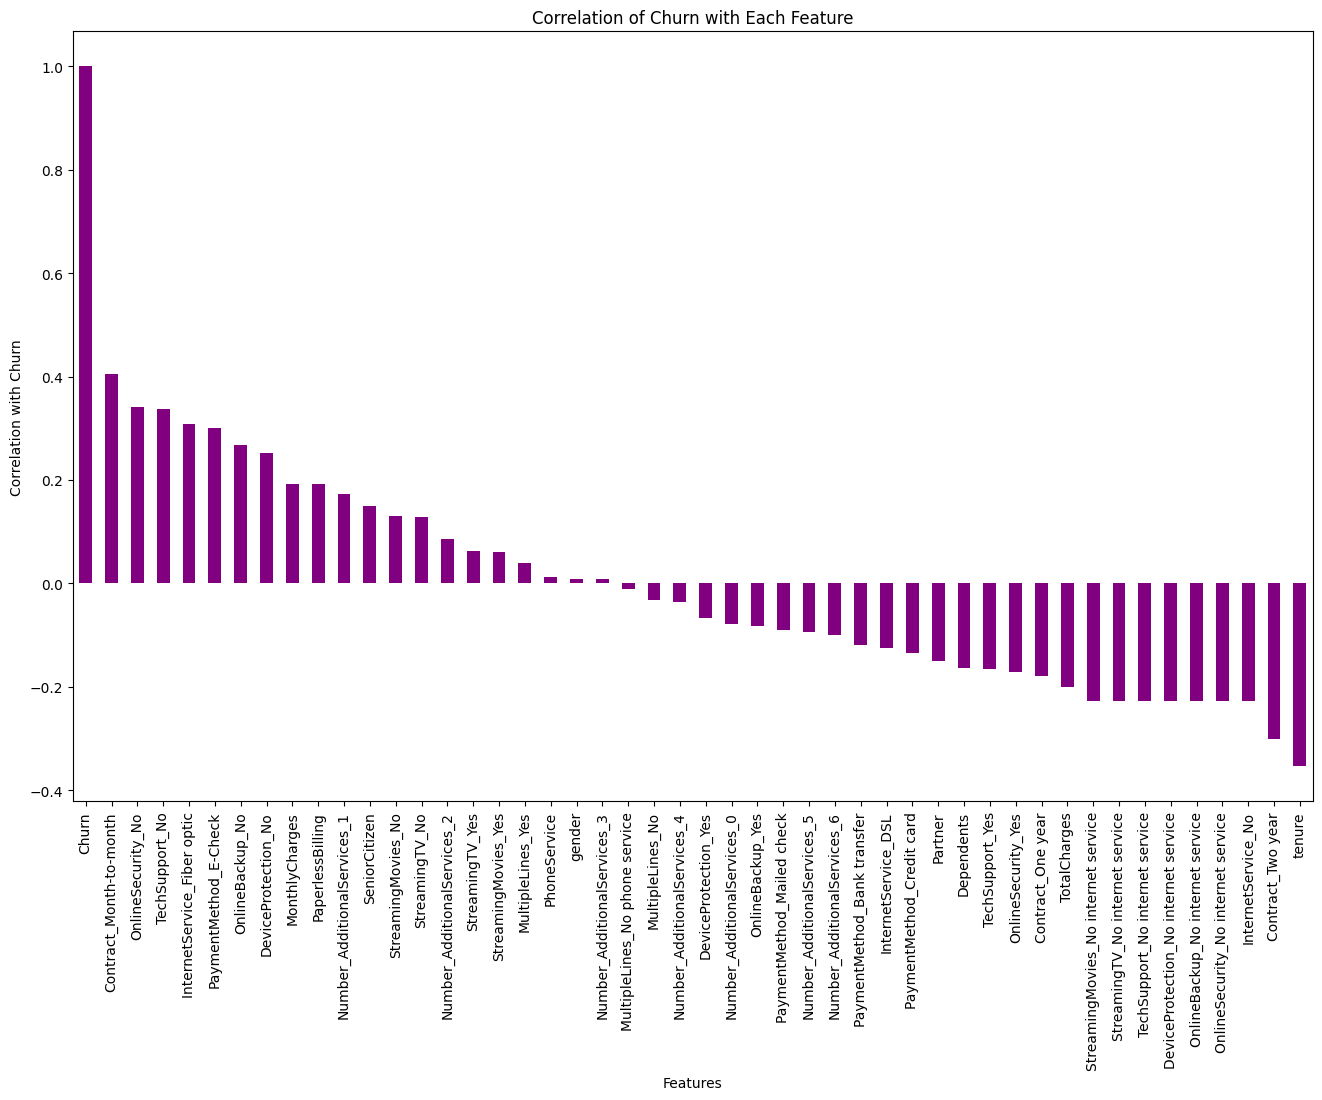

In [ ]:
# Import the necessary libraries
import matplotlib.pyplot as plt

# Calculate the correlation of Churn with each of the remaining features
correlation = final_df.corr()['Churn'].sort_values(ascending=False)

# Plot the correlation values
plt.figure(figsize=(16, 10))
correlation.plot(kind='bar', color='purple')  # Change the color to purple
plt.xlabel('Features')
plt.ylabel('Correlation with Churn')
plt.title('Correlation of Churn with Each Feature')
plt.show()


2.5 Training and Testing

In [ ]:
# Import the necessary libraries
from sklearn.model_selection import train_test_split

# Split the dataset into training and test sets
X = final_df.drop('Churn', axis=1).values
y = final_df['Churn'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100, stratify=y)

In [ ]:
X_df=X
X_df

array([[1.        , 0.        , 1.        , ..., 0.        , 0.11542289,
        0.0012751 ],
       [0.        , 0.        , 0.        , ..., 0.46478873, 0.38507463,
        0.21586661],
       [0.        , 0.        , 0.        , ..., 0.01408451, 0.35422886,
        0.01031041],
       ...,
       [1.        , 0.        , 1.        , ..., 0.14084507, 0.11293532,
        0.03780868],
       [0.        , 1.        , 1.        , ..., 0.04225352, 0.55870647,
        0.03321025],
       [0.        , 0.        , 0.        , ..., 0.91549296, 0.86965174,
        0.78764136]])

EVALUATION Metrics

Install manually with the command
!pip install scikit-plot

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Define a function that plots the feature weights for a classifier.
def feature_weights(X_df, classifier, classifier_name):
    weights = pd.Series(classifier.coef_[0], index=X_df.columns.values).sort_values(ascending=False)

    top_weights_selected = weights[:10]
    plt.figure(figsize=(7,6))
    plt.tick_params(labelsize=10)#plt.xlabel(fontsize=10)
    plt.title(f'{classifier_name} - Top 10 Features')
    top_weights_selected.plot(kind="bar")

    bottom_weights_selected = weights[-10:]
    plt.figure(figsize=(7,6))
    plt.tick_params(labelsize=10)#plt.xlabel(fontsize=10)
    plt.title(f'{classifier_name} - Bottom 10 Features')
    bottom_weights_selected.plot(kind="bar")
    plt.show()
    return print("")

In [ ]:
def confusion_matrix_plot(X_train, y_train, X_test, y_test, classifier, classifier_name):

    fig, ax = plt.subplots(figsize=(7, 6))
    disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, display_labels=["No Churn", "Churn"], cmap='YlOrBr', normalize=None, ax=ax)
    disp.ax_.set_title(f'{classifier_name} - Confusion Matrix')
    plt.show()

    fig, ax = plt.subplots(figsize=(7, 6))
    disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, display_labels=["No Churn", "Churn"], cmap='YlOrBr', normalize='true', ax=ax)
    disp.ax_.set_title(f'{classifier_name} - Confusion Matrix (norm.)')
    plt.show()

    print(f'Accuracy Score Test: {accuracy_score(y_test, y_pred_knn)}')
    print(f'Accuracy Score Train: {classifier.score(X_train, y_train)} (as comparison)')
    return print("")


In [ ]:
def roc_curve_auc_score(X_test, y_test, y_pred_probabilities, classifier_name):
    y_pred_prob = y_pred_probabilities[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    plt.plot(fpr, tpr, label=f'{classifier_name}')
    plt.plot([0, 1], [0, 1], 'k--')  # Add the dotted line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{classifier_name} - ROC Curve')
    plt.legend()
    plt.show()

    return print(f'AUC Score (ROC): {roc_auc_score(y_test, y_pred_prob)}\n')


In [ ]:
def precision_recall_curve_and_scores(X_test, y_test, y_pred, y_pred_probabilities, classifier_name):
    y_pred_prob = y_pred_probabilities[:, 1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

    plt.plot(recall, precision, label=classifier_name)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{classifier_name} - Precision-Recall Curve')
    plt.legend()
    plt.show()

    f1_score_result = f1_score(y_test, y_pred)
    auc_score_result = auc(recall, precision)

    return print(f'F1 Score: {f1_score_result} \nAUC Score (PR): {auc_score_result}\n')


Model Selection

XGboost

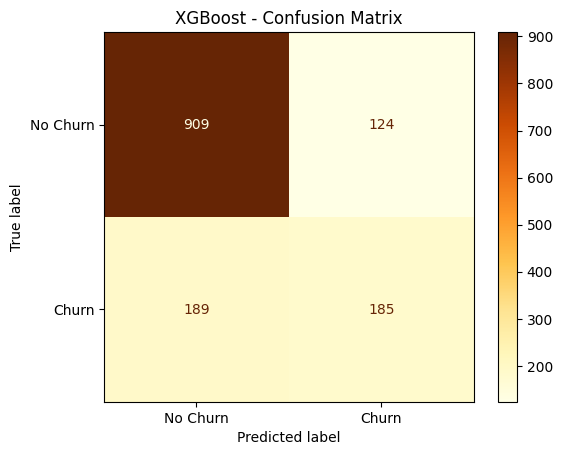

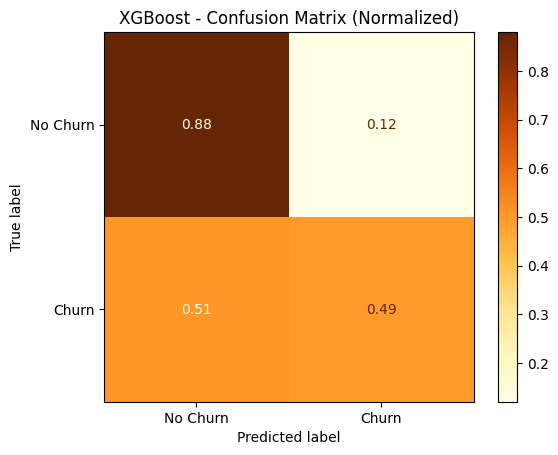

Accuracy Score Test: 0.7775408670931059
Accuracy Score Train: 0.9377777777777778 (as comparison)
AUC Score (ROC): 0.8223491103737102
F1 Score: 0.5417276720351392


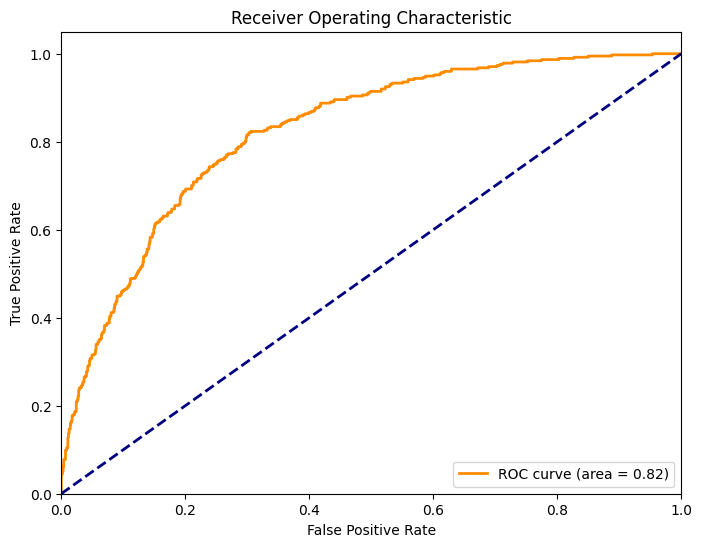

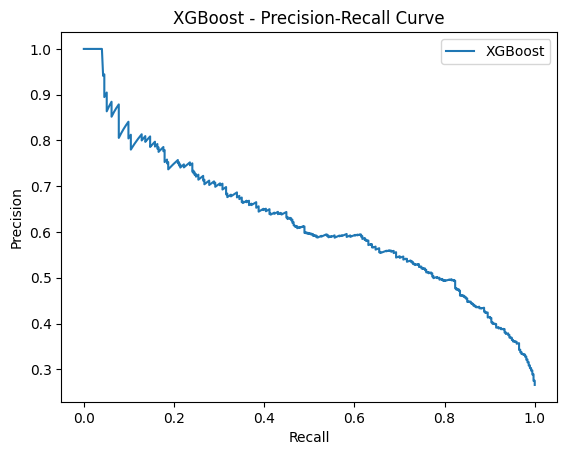

AUC Score (PR) for XGBoost: 0.6226700535388696


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc, precision_recall_curve, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Load and preprocess your data
# X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Instantiate and train the XGBoost model
params = {'objective': 'binary:logistic', 'eval_metric': 'logloss'}
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
num_round = 100
xgb_model = xgb.train(params, dtrain, num_round)

# Make predictions using the XGBoost model
y_pred_xgb_prob = xgb_model.predict(dtest)

# Convert probabilities to class labels using a threshold
threshold = 0.5
y_pred_xgb = [1 if prob > threshold else 0 for prob in y_pred_xgb_prob]

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_xgb)

# Display confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=["No Churn", "Churn"])
disp.plot(cmap='YlOrBr')
plt.title('XGBoost - Confusion Matrix')
plt.show()

# Calculate normalized confusion matrix
conf_matrix_norm = conf_matrix / conf_matrix.sum(axis=1, keepdims=True)

# Display normalized confusion matrix
disp_norm = ConfusionMatrixDisplay(conf_matrix_norm, display_labels=["No Churn", "Churn"])
disp_norm.plot(cmap='YlOrBr', values_format=".2f")
plt.title('XGBoost - Confusion Matrix (Normalized)')
plt.show()

# Evaluate the XGBoost model
accuracy_xgb_test = accuracy_score(y_test, y_pred_xgb)
accuracy_xgb_train = accuracy_score(y_train, xgb_model.predict(dtrain) > threshold)  # Calculate train accuracy

roc_auc = roc_auc_score(y_test, y_pred_xgb_prob)
fpr, tpr, _ = roc_curve(y_test, y_pred_xgb_prob)
roc_auc = auc(fpr, tpr)

precision, recall, _ = precision_recall_curve(y_test, y_pred_xgb_prob)
f1 = f1_score(y_test, y_pred_xgb)

print(f'Accuracy Score Test: {accuracy_xgb_test}')
print(f'Accuracy Score Train: {accuracy_xgb_train} (as comparison)')

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_xgb_prob)
plt.plot(recall, precision, label='XGBoost')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('XGBoost - Precision-Recall Curve')
plt.legend()
plt.show()

print(f'AUC Score (ROC): {roc_auc}')
print(f'F1 Score: {f1}')

from sklearn.metrics import precision_recall_curve, auc

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_xgb_prob)

# Calculate AUC score for precision-recall curve
auc_score_pr = auc(recall, precision)

print(f'AUC Score (PR) for XGBoost: {auc_score_pr}')


KNN

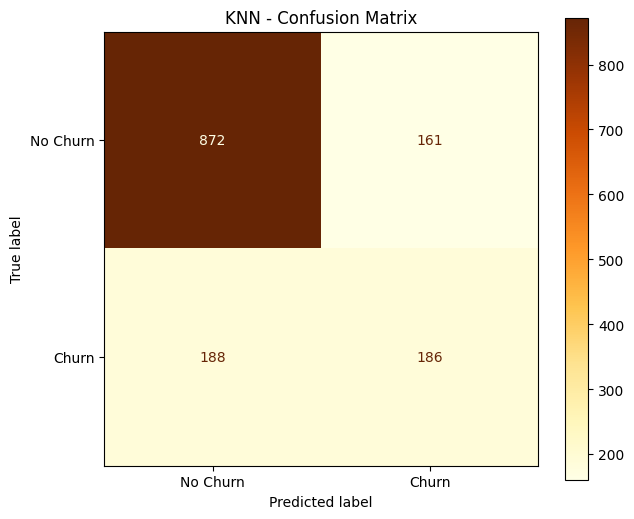

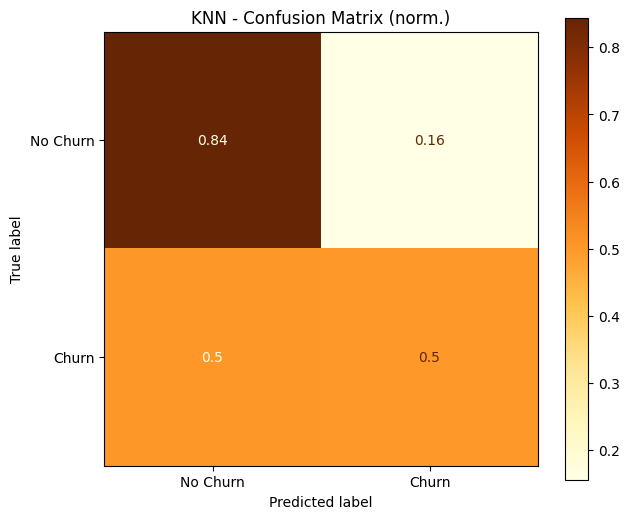

Accuracy Score Test: 0.751954513148543
Accuracy Score Train: 0.8334222222222222 (as comparison)



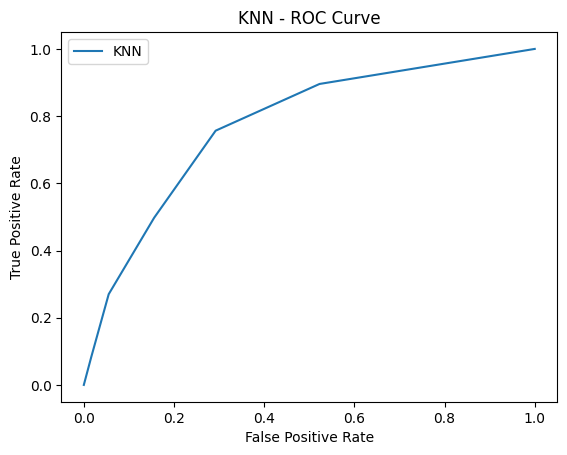

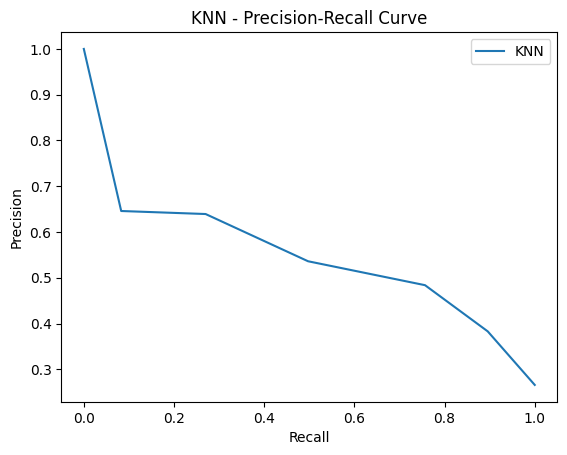

F1 Score: 0.5159500693481276 
AUC Score (PR): 0.5483351881461379



In [ ]:
#from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve, plot_precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier

# Instantiate and train the KNN classifier based on the training set
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Make predictions (classes and probabilities) with the trained classifier on the test set
y_pred_knn = knn.predict(X_test)
y_pred_knn_prob = knn.predict_proba(X_test)

# Plot model evaluations - Confusion Matrix
confusion_matrix_plot(X_train, y_train, X_test, y_test, knn, 'KNN')

# Plot model evaluations - ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn_prob[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN - ROC Curve')
plt.legend()
plt.show()

# Plot model evaluations - Precision-Recall Curve and F1 Score
precision_recall_curve_and_scores(X_test, y_test, y_pred_knn, y_pred_knn_prob, 'KNN')


Logistic Regression

In [ ]:
def confusion_matrix_plot(X_train, y_train, X_test, y_test, classifier, classifier_name, y_pred=None):
    fig, ax = plt.subplots(figsize=(7, 6))
    ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, display_labels=["No Churn", "Churn"], cmap='YlOrBr', ax=ax)
    ax.set_title(f'{classifier_name} - Confusion Matrix')
    plt.show()

    fig, ax = plt.subplots(figsize=(7, 6))
    ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, display_labels=["No Churn", "Churn"], cmap='YlOrBr', normalize='true', ax=ax)
    ax.set_title(f'{classifier_name} - Confusion Matrix (norm.)')
    plt.show()

    if y_pred is not None:
        accuracy = (y_test == y_pred).mean()
        print(f'Accuracy Score Test: {accuracy}')
        print(f'Accuracy Score Train: {classifier.score(X_train, y_train)} (as comparison)')

    return print("")


In [ ]:
from sklearn.linear_model import LogisticRegression

# Instantiate and train the logistic regression model based on the training set.
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Make predictions (classes and probabilities) with the trained logistic regression model on the test set.
y_pred_logreg = logreg.predict(X_test)
y_pred_logreg_prob = logreg.predict_proba(X_test)

# Plot model evaluations for logistic regression.
#feature_weights(X, logreg, 'Log. Regression')
confusion_matrix_plot(X_train, y_train, X_test, y_test, logreg, 'Log. Regression', y_pred_logreg)
roc_curve_auc_score(X_test, y_test, y_pred_logreg_prob, 'Log. Regression')
precision_recall_curve_and_scores(X_test, y_test, y_pred_logreg, y_pred_logreg_prob, 'Log. Regression')

In [ ]:
y_tst

array([0, 0, 0, ..., 1, 0, 1])

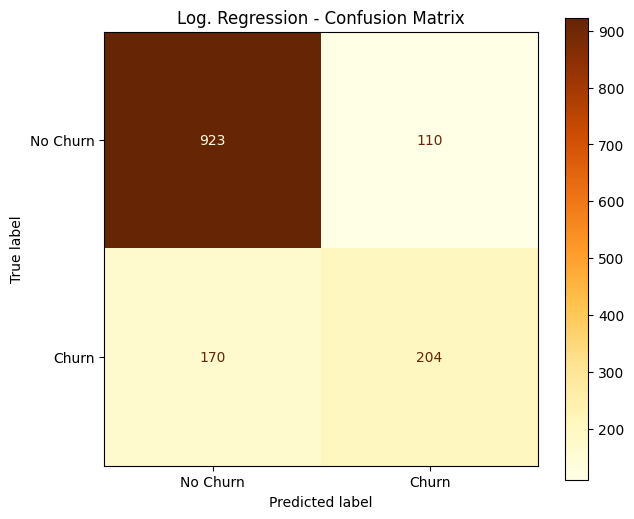

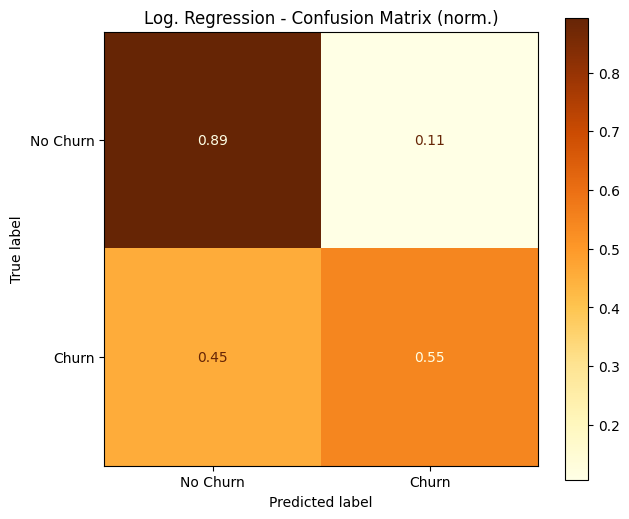

Accuracy Score Test: 0.8009950248756219
Accuracy Score Train: 0.8062222222222222 (as comparison)



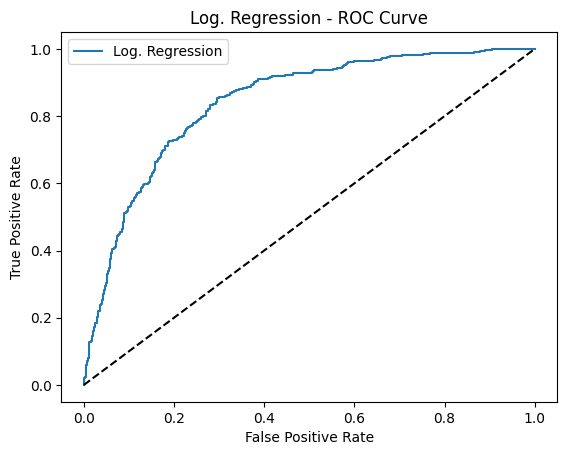

AUC Score (ROC): 0.841039804111383



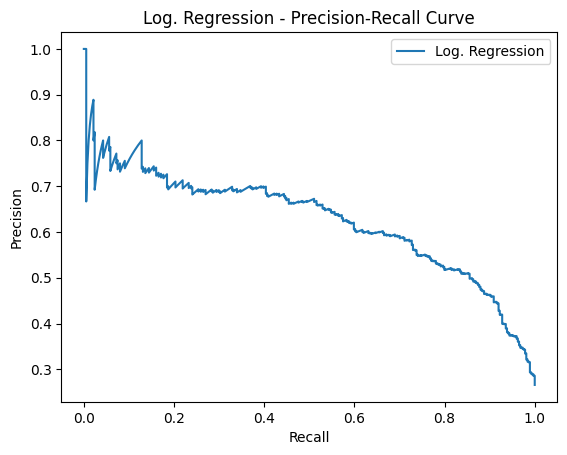

F1 Score: 0.5930232558139535 
AUC Score (PR): 0.6254528186304769



Random Forest

In [ ]:
# Define a function that plots the confusion matrix for a classifier and the train and test accuracy
def confusion_matrix_plot(X_train, y_train, X_test, y_test, classifier, y_pred, classifier_name):
    fig, ax = plt.subplots(figsize=(7, 6))
    disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, display_labels=["No Churn", "Churn"], cmap='YlOrBr', ax=ax)
    disp.ax_.set_title(f'{classifier_name} - Confusion Matrix (norm.)')
    plt.show()

    fig, ax = plt.subplots(figsize=(7, 6))
    disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, display_labels=["No Churn", "Churn"], cmap='YlOrBr', normalize='true', ax=ax)
    disp.ax_.set_title(f'{classifier_name} - Confusion Matrix')
    plt.show()

    accuracy_test = accuracy_score(y_test, y_pred)
    accuracy_train = classifier.score(X_train, y_train)

    print(f'Accuracy Score Test: {accuracy_test}')
    print(f'Accuracy Score Train: {accuracy_train} (as comparison)')


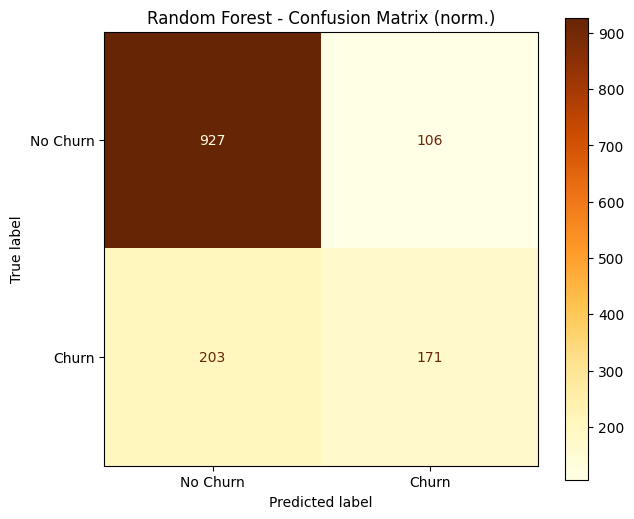

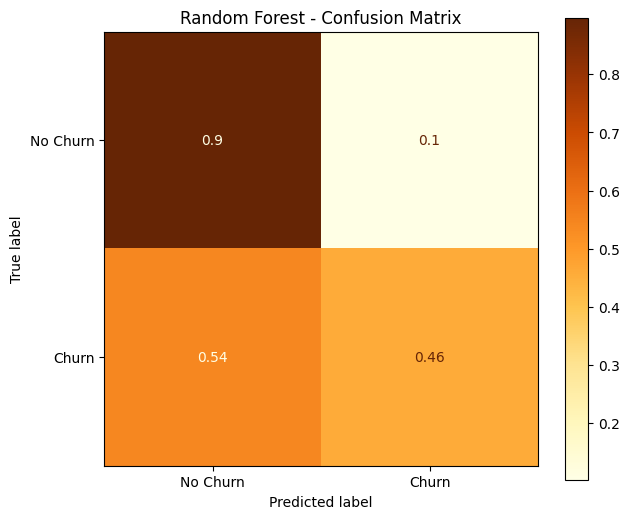

Accuracy Score Test: 0.7803837953091685
Accuracy Score Train: 0.9975111111111111 (as comparison)


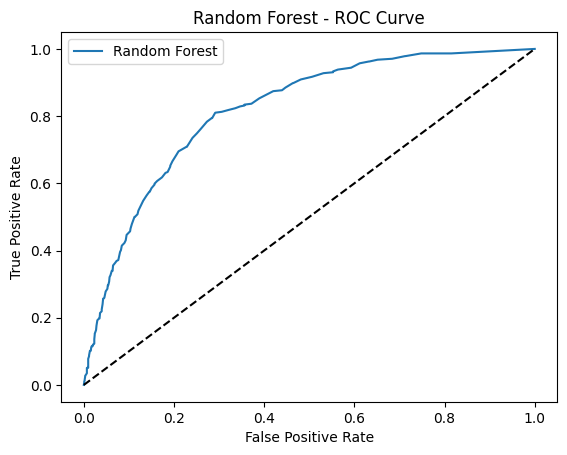

AUC Score (ROC): 0.8172745909065025



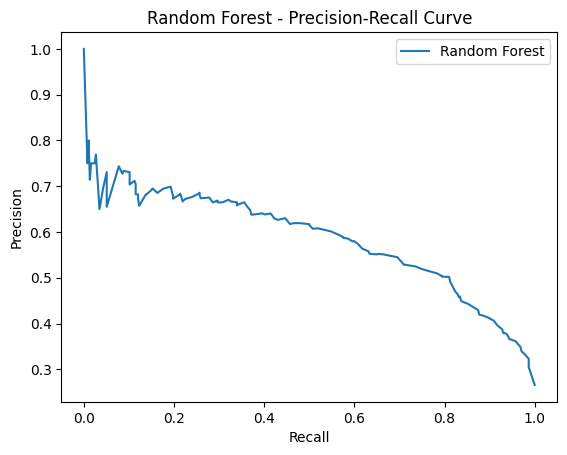

F1 Score: 0.5253456221198157 
AUC Score (PR): 0.585606398444942



In [ ]:
# Import Random Forest classifier from sklearn
from sklearn.ensemble import RandomForestClassifier

# Instantiate and train the random forest model based on the training set.
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Make predictions (classes and probabilities) with the trained model on the test set.
y_pred_rf = rfc.predict(X_test)
y_pred_rf_prob = rfc.predict_proba(X_test)

# Evaluate and Plot model evaluations.
confusion_matrix_plot(X_train, y_train, X_test, y_test, rf, y_pred_rf, 'Random Forest')
roc_curve_auc_score(X_test, y_test, y_pred_rf_prob, 'Random Forest')
precision_recall_curve_and_scores(X_test, y_test, y_pred_rf, y_pred_rf_prob, 'Random Forest')


SVM

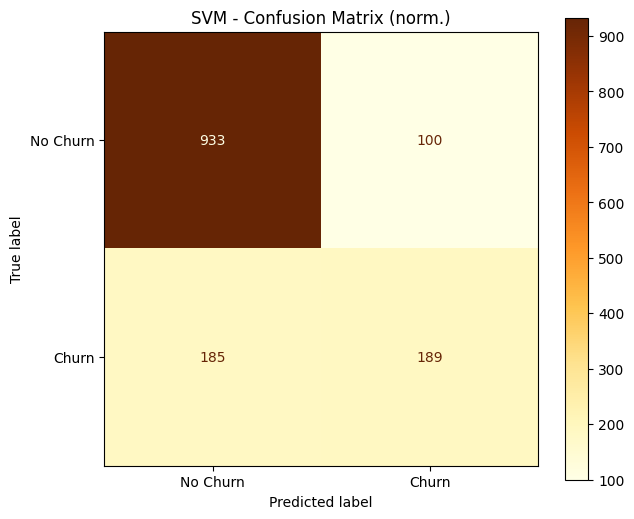

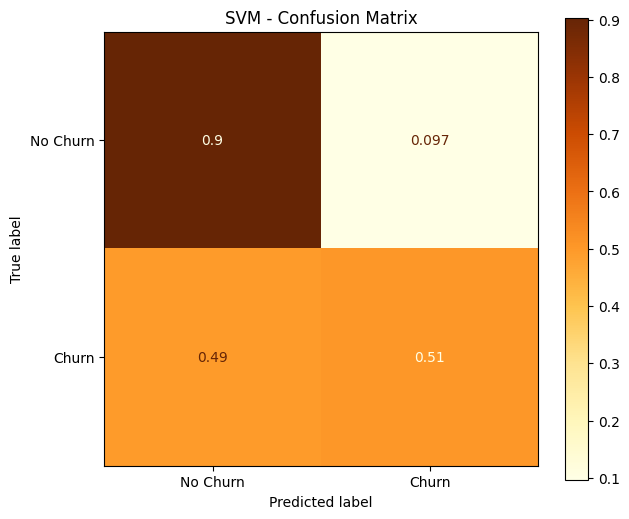

Accuracy Score Test: 0.7974413646055437
Accuracy Score Train: 0.8209777777777778 (as comparison)


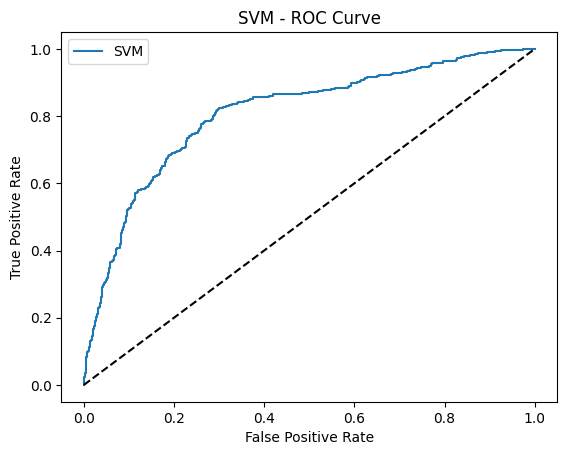

AUC Score (ROC): 0.8085841042392492



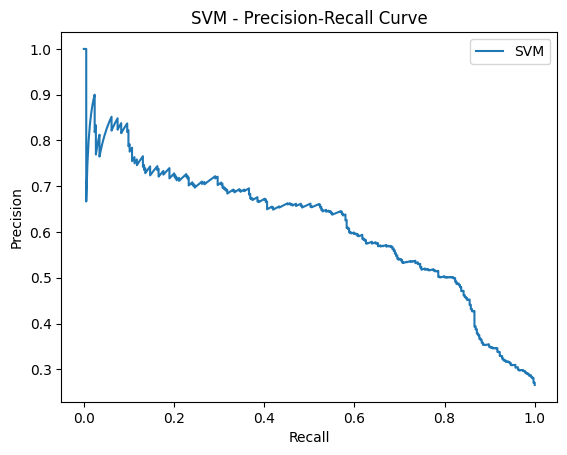

F1 Score: 0.5701357466063349 
AUC Score (PR): 0.6114415411472836



In [ ]:
from sklearn.svm import SVC

# Instantiate and train the SVM model on the training set.
support_vector_m = SVC(kernel='rbf', probability=True)
support_vector_m.fit(X_train, y_train)

# Make predictions (classes and probabilities) with the trained model on the test set.
y_pred_svm = support_vector_m.predict(X_test)
y_pred_svm_prob = support_vector_m.predict_proba(X_test)

# Plot model evaluations.
confusion_matrix_plot(X_train, y_train, X_test, y_test, support_vector_m, y_pred_svm, 'SVM')
roc_curve_auc_score(X_test, y_test, y_pred_svm_prob, 'SVM')
precision_recall_curve_and_scores(X_test, y_test, y_pred_svm, y_pred_svm_prob, 'SVM')


Hyper Parameter

XGBoost with Hyperparameter GridSearchCV

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Load and preprocess your data
# X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]
}

# Instantiate the XGBoost model
xgb_model = xgb.XGBClassifier(objective='binary:logistic')

# Instantiate and train the XGBoost model with GridSearchCV
xgb_grid = GridSearchCV(xgb_model, param_grid, cv=5)
xgb_grid.fit(X_train, y_train)

# Get the best parameters from GridSearchCV
best_params = xgb_grid.best_params_
print("Best parameters:", best_params)

# Make predictions using the best model
y_pred_xgb_grid = xgb_grid.predict(X_test)

# Evaluate the XGBoost model with best parameters
accuracy_xgb_grid = accuracy_score(y_test, y_pred_xgb_grid)
print("Accuracy of XGBoost model with best parameters:", accuracy_xgb_grid)


Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Accuracy of XGBoost model with best parameters: 0.8052594171997157


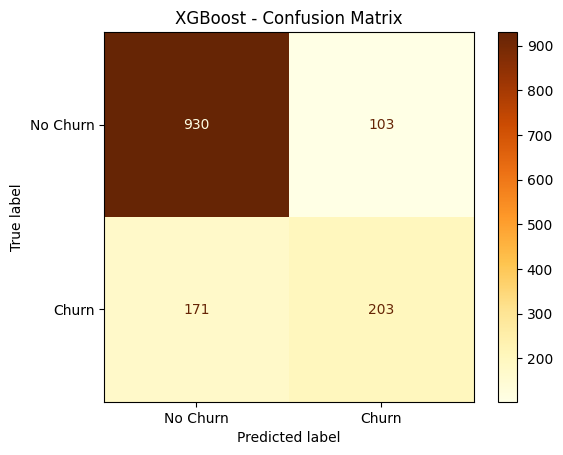

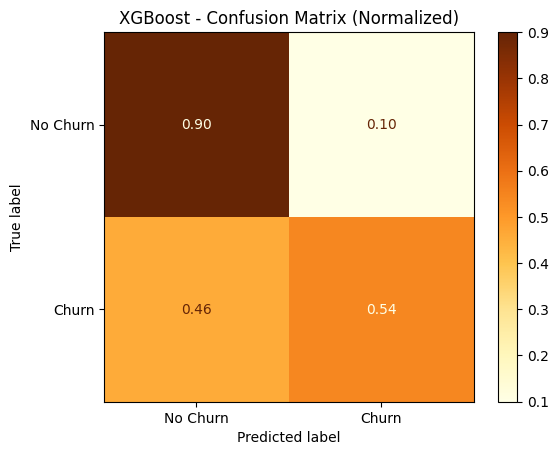

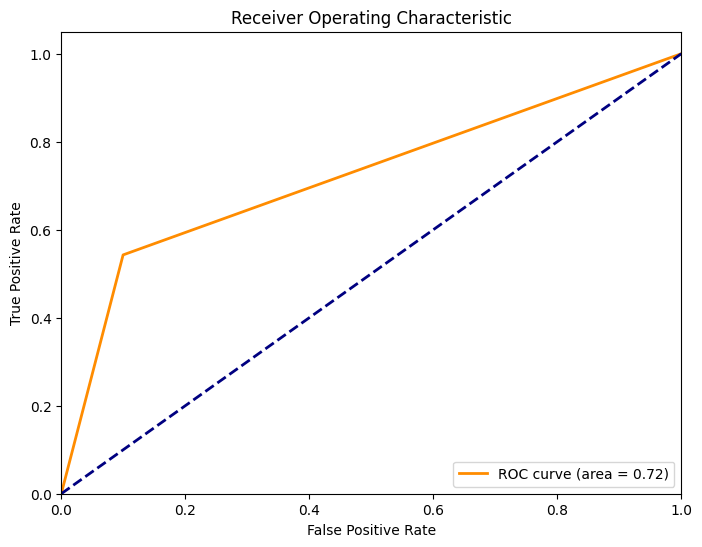

Accuracy Score Test: 0.7775408670931059
Accuracy Score Train: 0.9377777777777778 (as comparison)
AUC Score (ROC): 0.7215355824632061
F1 Score: 0.5970588235294116
AUC Score (PR) for XGBoost: 0.6638573113551164


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_xgb_grid)

# Display confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=["No Churn", "Churn"])
disp.plot(cmap='YlOrBr')
plt.title('XGBoost - Confusion Matrix')
plt.show()

# Calculate normalized confusion matrix
conf_matrix_norm = conf_matrix / conf_matrix.sum(axis=1, keepdims=True)

# Display normalized confusion matrix
disp_norm = ConfusionMatrixDisplay(conf_matrix_norm, display_labels=["No Churn", "Churn"])
disp_norm.plot(cmap='YlOrBr', values_format=".2f")
plt.title('XGBoost - Confusion Matrix (Normalized)')
plt.show()

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgb_grid)

# Calculate ROC AUC score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_xgb_grid)
f1 = 2 * (precision * recall) / (precision + recall)

# Calculate AUC score for precision-recall curve
auc_score_pr = auc(recall, precision)

print(f'Accuracy Score Test: {accuracy_xgb_test}')
print(f'Accuracy Score Train: {accuracy_xgb_train} (as comparison)')
print(f'AUC Score (ROC): {roc_auc}')
print(f'F1 Score: {f1[1]}')  # Select the F1 score corresponding to the desired threshold
print(f'AUC Score (PR) for XGBoost: {auc_score_pr}')


In [ ]:
# Use Pandas' read_csv method to read the whole file in memory
# (it will fail on our first try)
# Name the returned data frame "data1"
import pandas as pd

data1 = pd.read_csv(CCPT_FILE, encoding='latin')
data1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
# Assuming 'data1' is your copy of the original data before normalization
likely_churn_indices = [index for index, prediction in enumerate(y_pred_xgb_grid) if prediction == 1]
likely_churn_customers = data1.iloc[likely_churn_indices]

# Print the top ten records of likely churn customers
print(likely_churn_customers.head(2))

# Save the data of likely churn customers to a CSV file
likely_churn_customers.to_csv('likely_churn_customers.csv', index=False)

print(data1.columns)


    customerID gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
6   1452-KIOVK   Male              0      No        Yes      22          Yes   
11  7469-LKBCI   Male              0      No         No      16          Yes   

   MultipleLines InternetService       OnlineSecurity  ...  \
6            Yes     Fiber optic                   No  ...   
11            No              No  No internet service  ...   

       DeviceProtection          TechSupport          StreamingTV  \
6                    No                   No                  Yes   
11  No internet service  No internet service  No internet service   

        StreamingMovies        Contract PaperlessBilling  \
6                    No  Month-to-month              Yes   
11  No internet service        Two year               No   

              PaymentMethod MonthlyCharges  TotalCharges Churn  
6   Credit card (automatic)          89.10        1949.4    No  
11  Credit card (automatic)          18.95         32

KNN with Hyperparameter GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define parameter grid for GridSearch and instantiate and train the model.
param_grid = {'n_neighbors': range(1, 30)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train, y_train)

# Make predictions (classes and probabilities) with the trained model on the test set.
y_pred_knn_tuned = knn_cv.predict(X_test)
y_pred_knn_tuned_prob = knn_cv.predict_proba(X_test)

print('KNN best number of neighbors:', knn_cv.best_params_, '\n')


KNN best number of neighbors: {'n_neighbors': 29} 



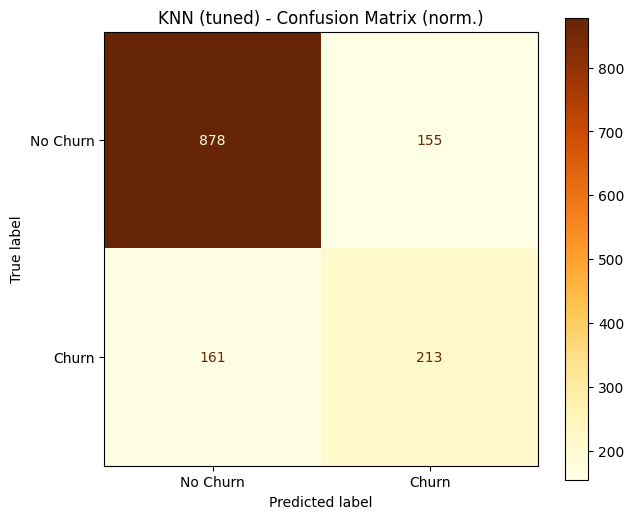

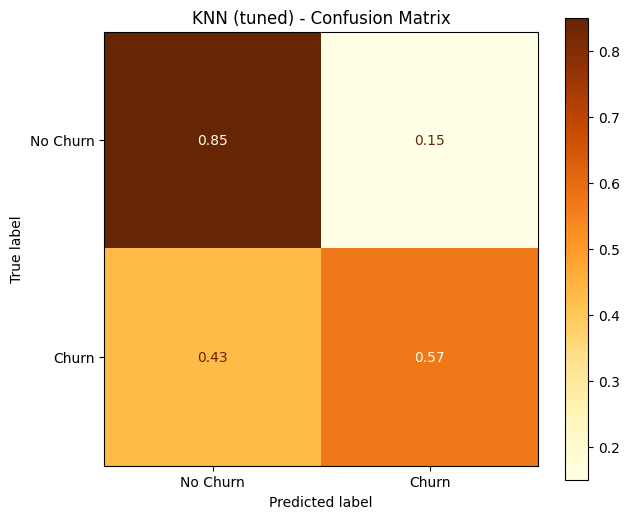

Accuracy Score Test: 0.775408670931059
Accuracy Score Train: 0.7987555555555556 (as comparison)


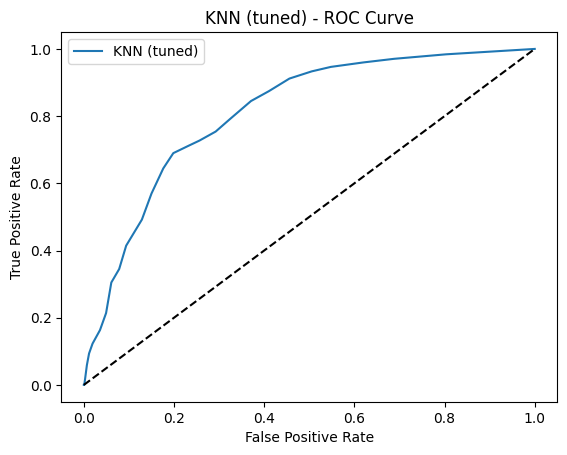

AUC Score (ROC): 0.8115063855340605



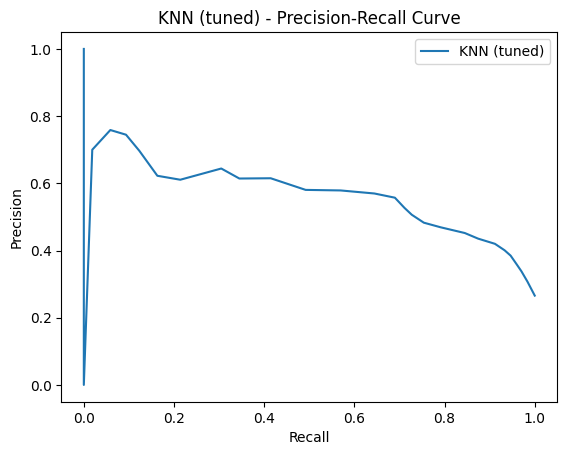

F1 Score: 0.5741239892183289 
AUC Score (PR): 0.5620651903967724



In [ ]:
# Plot model evaluations.
confusion_matrix_plot(X_train, y_train, X_test, y_test, knn_cv, y_pred_knn_tuned, 'KNN (tuned)')
roc_curve_auc_score(X_test, y_test, y_pred_knn_tuned_prob, 'KNN (tuned)')
precision_recall_curve_and_scores(X_test, y_test, y_pred_knn_tuned, y_pred_knn_tuned_prob, 'KNN (tuned)')


Logistic wity Hyper

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid for GridSearchCV
param_grid = {'penalty': ['l2'], 'C': np.arange(0.1, 5, 0.1)}

# Instantiate and train the logistic regression model with GridSearchCV
logreg = LogisticRegression(max_iter=1000, solver='lbfgs')
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)
logreg_cv.fit(X_train, y_train)

# Make predictions (classes and probabilities) with the tuned model on the test set
y_pred_logreg_tuned = logreg_cv.predict(X_test)
y_pred_logreg_tuned_prob = logreg_cv.predict_proba(X_test)

print('Logistic Regression best parameters:', logreg_cv.best_params_, '\n')


Logistic Regression best parameters: {'C': 0.6, 'penalty': 'l2'} 



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


245 fits failed out of a total of 490.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
245 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: S

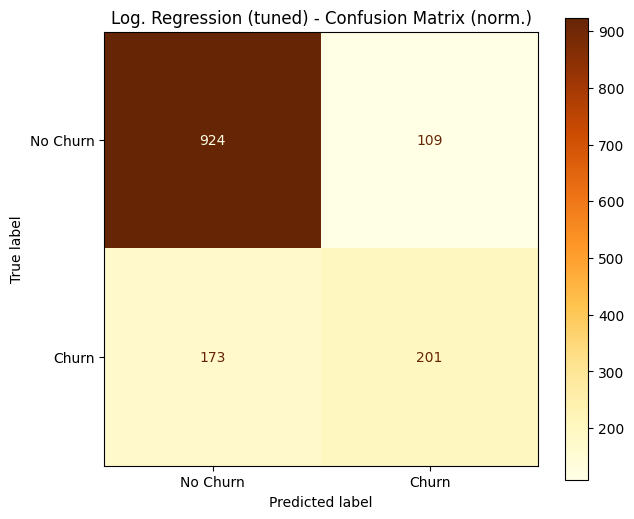

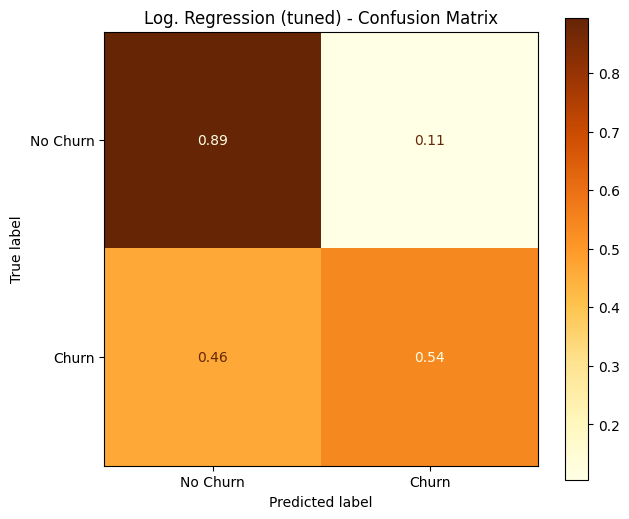

Accuracy Score Test: 0.7995735607675906
Accuracy Score Train: 0.8058666666666666 (as comparison)


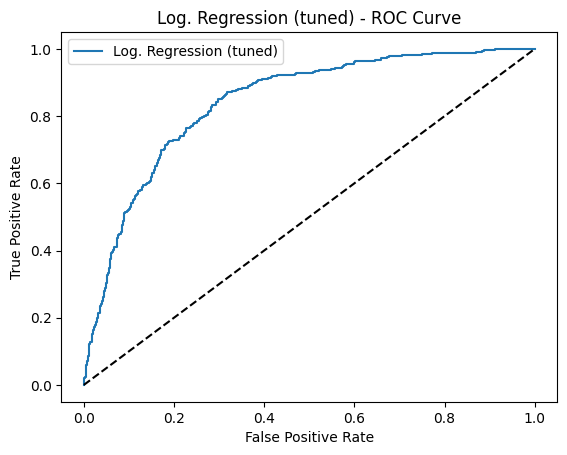

AUC Score (ROC): 0.8405195396824574



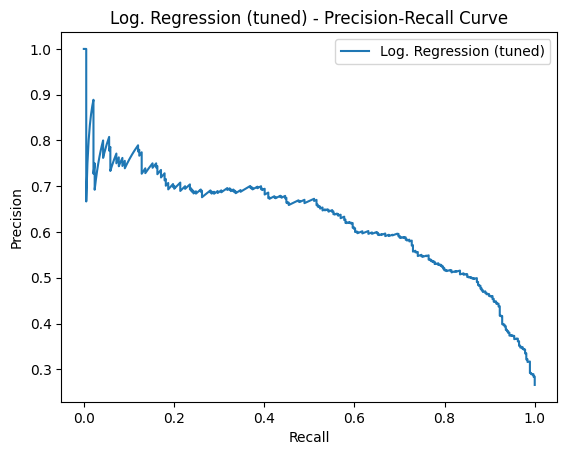

F1 Score: 0.587719298245614 
AUC Score (PR): 0.6243794407507797



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define parameter grid for GridSearch
param_grid = {'C': np.arange(0.1, 5, 0.1), 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression model
logreg = LogisticRegression(max_iter=1000)

# Perform GridSearchCV to find the best parameters and train the model
logreg_tuned_gs = GridSearchCV(logreg, param_grid, cv=5)
logreg_tuned_gs.fit(X_train, y_train)

# Make predictions (classes and probabilities) with the trained model on the test set
y_pred_logreg_tuned = logreg_tuned_gs.predict(X_test)
y_pred_logreg_tuned_prob = logreg_tuned_gs.predict_proba(X_test)

# Plot model evaluations.
confusion_matrix_plot(X_train, y_train, X_test, y_test, logreg_tuned_gs, y_pred_logreg_tuned, 'Log. Regression (tuned)')
roc_curve_auc_score(X_test, y_test, y_pred_logreg_tuned_prob, 'Log. Regression (tuned)')
precision_recall_curve_and_scores(X_test, y_test, y_pred_logreg_tuned, y_pred_logreg_tuned_prob, 'Log. Regression (tuned)')


Random Forest with Hyperparameter

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid for RandomizedSearch and instantiate and train the model.
param_grid_rf = {
    'n_estimators': np.arange(10, 2000, 10),
    'max_features': ['sqrt'],  # Explicitly set max_features to 'sqrt'
    'max_depth': np.arange(10, 200, 10),
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier()
rf_random_grid = RandomizedSearchCV(estimator=rf, param_distributions=param_grid_rf, cv=5, verbose=0)
rf_random_grid.fit(X_train, y_train)

# Make predictions (classes and probabilities) with the trained model on the test set.
y_pred_rf_tuned = rf_random_grid.predict(X_test)
y_pred_rf_tuned_prob = rf_random_grid.predict_proba(X_test)

print('Random Forest - Best Parameters: ', rf_random_grid.best_params_)


Random Forest - Best Parameters:  {'n_estimators': 1270, 'max_features': 'sqrt', 'max_depth': 130, 'criterion': 'entropy', 'bootstrap': True}


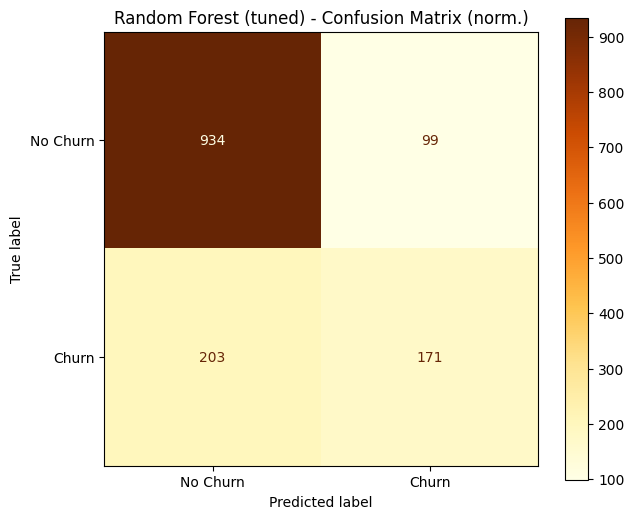

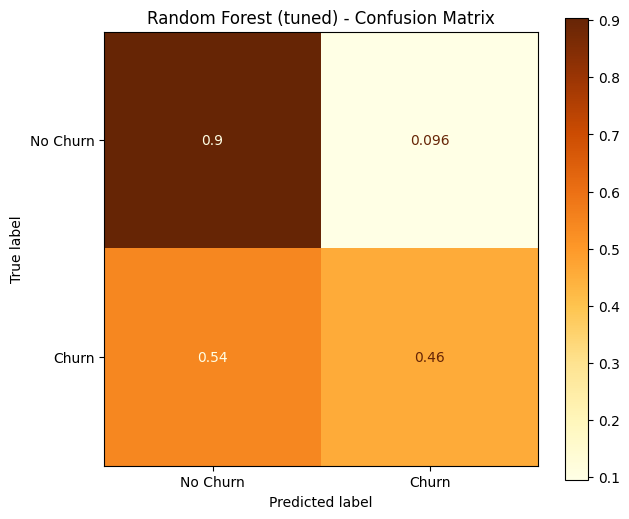

Accuracy Score Test: 0.7853589196872779
Accuracy Score Train: 0.9975111111111111 (as comparison)


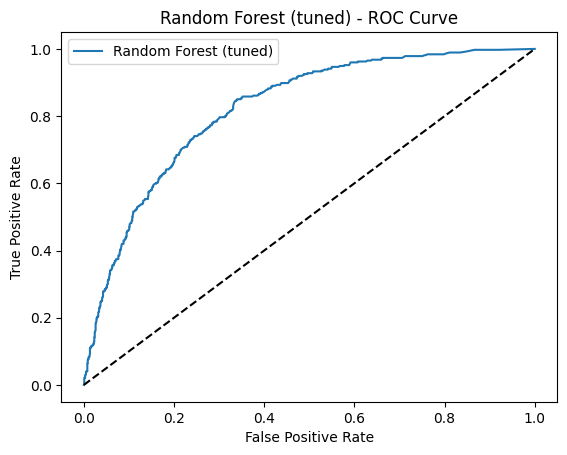

AUC Score (ROC): 0.8214134109157172



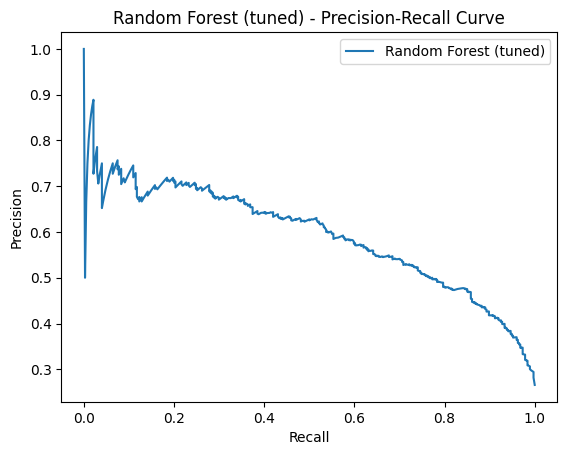

F1 Score: 0.531055900621118 
AUC Score (PR): 0.5920742013833641



In [ ]:
# Plot model evaluations - Confusion Matrix
confusion_matrix_plot(X_train, y_train, X_test, y_test, rf_random_grid, y_pred_rf_tuned, 'Random Forest (tuned)')

# Plot model evaluations - ROC Curve and AUC Score
roc_curve_auc_score(X_test, y_test, y_pred_rf_tuned_prob, 'Random Forest (tuned)')

# Plot model evaluations - Precision-Recall Curve and Scores
precision_recall_curve_and_scores(X_test, y_test, y_pred_rf_tuned, y_pred_rf_tuned_prob, 'Random Forest (tuned)')


SVM with Hyper

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define parameter grid for GridSearch and instantiate and train the model.
param_grid_svm = {'C': np.arange(0.1, 3, 0.1)}
support_vector_m = SVC(kernel='linear', probability=True)
support_vector_m_tuned = GridSearchCV(support_vector_m, param_grid_svm, cv=5)
support_vector_m_tuned.fit(X_train, y_train)

# Make predictions (classes and probabilities) with the trained model on the test set.
y_pred_svm_tuned = support_vector_m_tuned.predict(X_test)
y_pred_svm_tuned_prob = support_vector_m_tuned.predict_proba(X_test)

print('SVM best C value:', support_vector_m_tuned.best_params_)


In [ ]:
# Plot model evaluations - Confusion Matrix
confusion_matrix_plot(X_train, y_train, X_test, y_test, support_vector_m_tuned, y_pred_svm_tuned, 'SVM (tuned)')

# Plot model evaluations - ROC Curve and AUC Score
roc_curve_auc_score(X_test, y_test, y_pred_svm_tuned_prob, 'SVM (tuned)')

# Plot model evaluations - Precision-Recall Curve and Scores
precision_recall_curve_and_scores(X_test, y_test, y_pred_svm_tuned, y_pred_svm_tuned_prob, 'SVM (tuned)')


## Conclusion
The evaluation of these models revealed that the tuned XGBoost model demonstrated superior performance across most metrics, showcasing higher accuracy, AUC scores (ROC and PR), and F1 score compared to both default XGBoost and other models. This suggests that the tuned XGBoost model is well-equipped to identify potential churners with greater accuracy and precision. Its robustness in differentiating between churn and non-churn cases, as evidenced by the high AUC scores, highlights its reliability in real-world applications.

It's important to note that while the XGBoost (Tuned) model displayed the best overall performance, selecting the optimal model should also consider factors such as interpretability, computational complexity, and business requirements. This model evaluation process provides valuable insights for telecommunications companies aiming to enhance customer retention strategies through predictive modeling. By leveraging advanced techniques like XGBoost and hyperparameter tuning, these companies can make informed decisions and proactively address churn, ultimately leading to improved customer satisfaction and business growth.
